In [6]:
pip install opencv-python numpy pandas webcolors

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from webcolors import rgb_to_name 

In [8]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [9]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [38]:
def get_name(code):
    samples = [[0,0,0],[255,255,255],[255,0,0],[0,0,255],[0,255,0]]
    y = ["Black","White","Red","Blue","Green"]
    from sklearn.neighbors import KNeighborsClassifier
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(samples,y)
    return(neigh.predict(code))

In [30]:
def get_colors(image, number_of_colors, show_chart):
   
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = get_name(rgb_colors), colors = hex_colors)
    
    return rgb_colors

[array([211.8332737 , 207.47817531, 193.98783542]),
 array([221.25284513,  40.67491341,  40.89559624]),
 array([102.30640084, 128.58394544, 114.54512067]),
 array([228.20125563, 199.03139067, 124.6063729 ]),
 array([144.99451905,  82.20142505,  28.85393258]),
 array([210.36324566, 132.60684201,  67.72013065]),
 array([174.11561622, 170.64171016, 156.3073063 ]),
 array([237.45963387, 237.10154089, 234.85157382])]

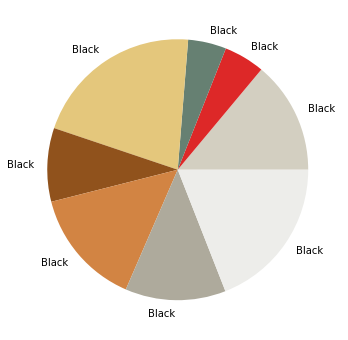

In [39]:
get_colors(get_image('sample_image.png'), 8, True)